# Explore Bike Share Data

For this project, our goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York. 


<strong>Table of Contents</strong>
- [Inspecting the Data](#inspect)
- [Data Wrangling](#wrangle)

- [Question 1](#1)
- [Question 2](#2)
- [Question 3](#3)

<hr style='border:2px solid black'>

In [1]:
library(dplyr, warn.conflicts = FALSE) #used for data manipulation
library(ggplot2) #used for visualizing data
library(lubridate, warn.conflicts = FALSE) #used to parse dates
library(tidyr) #used to tidy messy data

In [2]:
chi <- read.csv('chicago.csv')
ny <- read.csv('new_york_city.csv')
wash <- read.csv('washington.csv')

<hr style='border:2px solid black'>

<a id='inspect'></a>
## Inspecting the Data

**Exploring the Chicago data set**

In [3]:
head(chi, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975


In [4]:
names(chi)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [5]:
str(chi)

'data.frame':	8630 obs. of  9 variables:
 $ X            : int  1423854 955915 9031 304487 45207 1473887 961916 65924 606841 135470 ...
 $ Start.Time   : Factor w/ 8624 levels "2017-01-01 00:40:14",..: 7876 5303 73 1721 267 8173 5347 368 3376 795 ...
 $ End.Time     : Factor w/ 8625 levels "2017-01-01 00:46:32",..: 7876 5303 73 1722 267 8173 5346 368 3376 796 ...
 $ Trip.Duration: int  321 1610 416 350 534 586 281 723 689 493 ...
 $ Start.Station: Factor w/ 472 levels "2112 W Peterson Ave",..: 468 424 291 80 103 119 22 255 374 420 ...
 $ End.Station  : Factor w/ 471 levels "","2112 W Peterson Ave",..: 132 381 469 409 151 70 467 251 200 118 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 2 3 3 3 3 2 1 3 3 ...
 $ Birth.Year   : num  1992 1992 1981 1986 1975 ...


> Checking the data set for null values.  We will be looking to see if any Nulls exist first and if they do, counting the amount per column

In [6]:
anyNA(chi)

[1] TRUE

In [7]:
colSums(is.na(chi))

X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             0             0 
  End.Station     User.Type        Gender    Birth.Year 
            0             0             0          1747

<hr style='border:1px solid black'>

**Exploring the NYC dataset**

In [8]:
head(ny, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992


In [9]:
ny

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986
1675753,2017-03-06 16:22:53,2017-03-06 16:30:51,478,Front St & Gold St,Lafayette Ave & Fort Greene Pl,Subscriber,Male,1982
1692245,2017-03-07 07:42:24,2017-03-07 08:49:42,4038,E 89 St & York Ave,Broadway & Battery Pl,Subscriber,Male,1984
2271331,2017-04-02 08:02:36,2017-04-02 09:28:08,5132,Central Park S & 6 Ave,Central Park S & 6 Ave,Customer,,NA
1558339,2017-03-01 23:01:31,2017-03-01 23:06:41,309,E 3 St & 1 Ave,E 25 St & 2 Ave,Subscriber,Male,1992


In [10]:
names(ny)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [11]:
str(ny)

'data.frame':	54770 obs. of  9 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 54568 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 54562 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: int  795 692 1325 703 329 998 478 4038 5132 309 ...
 $ Start.Station: Factor w/ 636 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 638 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 3 3 2 3 3 3 3 1 3 ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...


> Checking the data set for null values.  We will be looking to see if any Nulls exist first and if they do, counting the amount per column

In [12]:
anyNA(ny)

[1] TRUE

In [13]:
colSums(is.na(ny))

X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             1             0 
  End.Station     User.Type        Gender    Birth.Year 
            0             0             0          5218

In [14]:
colSums(is.na(ny[c('Trip.Duration','Birth.Year')]))

Trip.Duration    Birth.Year 
            1          5218

<hr style='border:1px solid black'>

**Exploring the Washington data set**

In [15]:
head(wash, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber


In [16]:
names(wash)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"

In [17]:
str(wash)

'data.frame':	89051 obs. of  7 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ Trip.Duration: num  489 403 637 1827 1549 ...
 $ Start.Station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ End.Station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...


> Checking the data set for null values.  We will be looking to see if any Nulls exist first and if they do, counting the amount per column

In [18]:
anyNA(wash)

[1] TRUE

In [19]:
colSums(is.na(wash))

X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             1             0 
  End.Station     User.Type 
            0             0

> **Observations:** <br>
1. The Washington data set did not include gender or birthyear
2. The Start.Time and End.Time should be a date datatype
3. The Trip.Duration column is a different datatype in the Washington dataset than the others.
4. There are null values in New York columns Trip.duration and Birth.Year
5. There are null values in Washington column Trip.duration
6. There are null values in Chicago column Birth.Year
7. Trip duration is in seconds

<hr style='border:2px solid black'>

<a id='wrangle'></a>
## Data Wrangling

### Prepare data sets to be joined

#### Adding missing columns to prepare for joining

In [20]:
wash$Gender <- wash$Birth.Year <- NA

#### Changing the Trip Duration data type in the Washington Data set

In [21]:
wash$Trip.Duration <- as.integer(wash$Trip.Duration)

#### Adding Location columns

In [22]:
chi$Location <- 'Chicago'
ny$Location <- 'New York'
wash$Location <- 'Washington'   

<hr style='border:1px solid black'>

### Merging Datasets

In [23]:
bike_data <- rbind(chi, ny)
bike_data <- rbind(bike_data, wash)

#### Updating Column name for X column

In [24]:
colnames(bike_data)[colnames(bike_data) == 'X'] ='Ride.ID'

#### Removing Rows with null Time data

In [25]:
bike_data[is.na(bike_data$Trip.Duration), ]

,Ride.ID,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,Location
63400,6078570,2017-06-18 16:20:21,201,NA,,,,,NA,New York
152451,132,,,NA,,,,NA,NA,Washington


In [26]:
# Using drop_na from the tidyr library to drop rows with null values for Trip Duration
bike_data <- bike_data %>% drop_na(Trip.Duration)

In [27]:
#confirming removal
bike_data[is.na(bike_data$Trip.Duration), ]

Ride.ID,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,Location


#### Updating Data types for the Date Time fields

In [28]:
#using the ymd_hms function from the lubridate library to convert the date fields from string fields
bike_data$Start.Time <- ymd_hms(bike_data$Start.Time)
bike_data$End.Time <- ymd_hms(bike_data$End.Time)

#### Creating a new Column for the Weekday Name

In [29]:
bike_data$Day.Name <- weekdays(bike_data$Start.Time, abbreviate = FALSE)

#### Creating a new Column for Time traveled in minutes

In [30]:
bike_data$Trip.Duration.Min <- round((bike_data$Trip.Duration / 60), digits = 2)

In [31]:
#renaming trip duration column to reflect unit of measurement
colnames(bike_data)[colnames(bike_data) == 'Trip.Duration'] ='Trip.Duration.Sec'

#### Hour departed

In [32]:
bike_data$Hour.Departed <- hour(bike_data$Start.Time) 

<hr style='border:1px solid black'>

**Test**

In [33]:
head(bike_data, 5)

Ride.ID,Start.Time,End.Time,Trip.Duration.Sec,Start.Station,End.Station,User.Type,Gender,Birth.Year,Location,Day.Name,Trip.Duration.Min,Hour.Departed
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,Chicago,Friday,5.35,15
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,Chicago,Thursday,26.83,18
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981,Chicago,Wednesday,6.93,8
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986,Chicago,Monday,5.83,13
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975,Chicago,Tuesday,8.90,14


In [34]:
tail(bike_data, 5)

,Ride.ID,Start.Time,End.Time,Trip.Duration.Sec,Start.Station,End.Station,User.Type,Gender,Birth.Year,Location,Day.Name,Trip.Duration.Min,Hour.Departed
152446,1484340,2017-06-10 10:58:09,2017-06-10 11:25:58,1669,M St & New Jersey Ave SE,4th St & Madison Dr NW,Customer,NA,NA,Washington,Saturday,27.82,10
152447,555788,2017-03-22 18:46:00,2017-03-22 19:04:00,1082,8th & H St NW,21st & I St NW,Subscriber,NA,NA,Washington,Wednesday,18.03,18
152448,739004,2017-04-09 04:00:22,2017-04-09 04:09:54,571,Eckington Pl & Q St NE,Columbus Circle / Union Station,Subscriber,NA,NA,Washington,Sunday,9.52,4
152449,1214907,2017-05-19 09:00:53,2017-05-19 09:07:38,404,1st & M St NE,1st & Rhode Island Ave NW,Subscriber,NA,NA,Washington,Friday,6.73,9
152450,1419806,2017-06-06 04:27:33,2017-06-06 04:49:59,1345,10th & Florida Ave NW,Georgetown Harbor / 30th St NW,Customer,NA,NA,Washington,Tuesday,22.42,4


In [35]:
str(bike_data)

'data.frame':	152449 obs. of  13 variables:
 $ Ride.ID          : int  1423854 955915 9031 304487 45207 1473887 961916 65924 606841 135470 ...
 $ Start.Time       : POSIXct, format: "2017-06-23 15:09:32" "2017-05-25 18:19:03" ...
 $ End.Time         : POSIXct, format: "2017-06-23 15:14:53" "2017-05-25 18:45:53" ...
 $ Trip.Duration.Sec: int  321 1610 416 350 534 586 281 723 689 493 ...
 $ Start.Station    : Factor w/ 1585 levels "2112 W Peterson Ave",..: 468 424 291 80 103 119 22 255 374 420 ...
 $ End.Station      : Factor w/ 1586 levels "","2112 W Peterson Ave",..: 132 381 469 409 151 70 467 251 200 118 ...
 $ User.Type        : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ Gender           : Factor w/ 3 levels "","Female","Male": 3 2 3 3 3 3 2 1 3 3 ...
 $ Birth.Year       : num  1992 1992 1981 1986 1975 ...
 $ Location         : chr  "Chicago" "Chicago" "Chicago" "Chicago" ...
 $ Day.Name         : chr  "Friday" "Thursday" "Wednesday" "Monday" ...
 $ Trip.Duration

In [36]:
summary(bike_data)

    Ride.ID          Start.Time                     End.Time                  
 Min.   :      7   Min.   :2017-01-01 00:11:00   Min.   :2017-01-01 00:14:00  
 1st Qu.: 589315   1st Qu.:2017-03-07 08:12:34   1st Qu.:2017-03-07 08:25:59  
 Median :1184899   Median :2017-04-23 05:16:29   Median :2017-04-23 05:19:24  
 Mean   :1781608   Mean   :2017-04-17 05:38:37   Mean   :2017-04-17 05:52:01  
 3rd Qu.:2085919   3rd Qu.:2017-05-31 05:29:20   3rd Qu.:2017-05-31 05:36:46  
 Max.   :6816152   Max.   :2017-06-30 23:52:44   Max.   :2017-07-01 12:12:56  
                                                                              
 Trip.Duration.Sec                              Start.Station   
 Min.   :     60   Columbus Circle / Union Station     :  1700  
 1st Qu.:    392   Lincoln Memorial                    :  1546  
 Median :    667   Jefferson Dr & 14th St SW           :  1488  
 Mean   :   1098   Massachusetts Ave & Dupont Circle NW:  1219  
 3rd Qu.:   1158   Jefferson Memorial      

<hr style='border:2px solid black'>

<a id='1'></a>
### Question 1


**What is the most popular day of week to use a bike share system?**

In [37]:
#getting a count of the rides taken each day
day_count <- as.data.frame(table(bike_data$Day.Name))
colnames(day_count)[colnames(day_count) == 'Var1'] ='Day'
colnames(day_count)[colnames(day_count) == 'Freq'] ='Count'
day_count

Day,Count
Friday,22379
Monday,20593
Saturday,19459
Sunday,19273
Thursday,23187
Tuesday,22478
Wednesday,25080


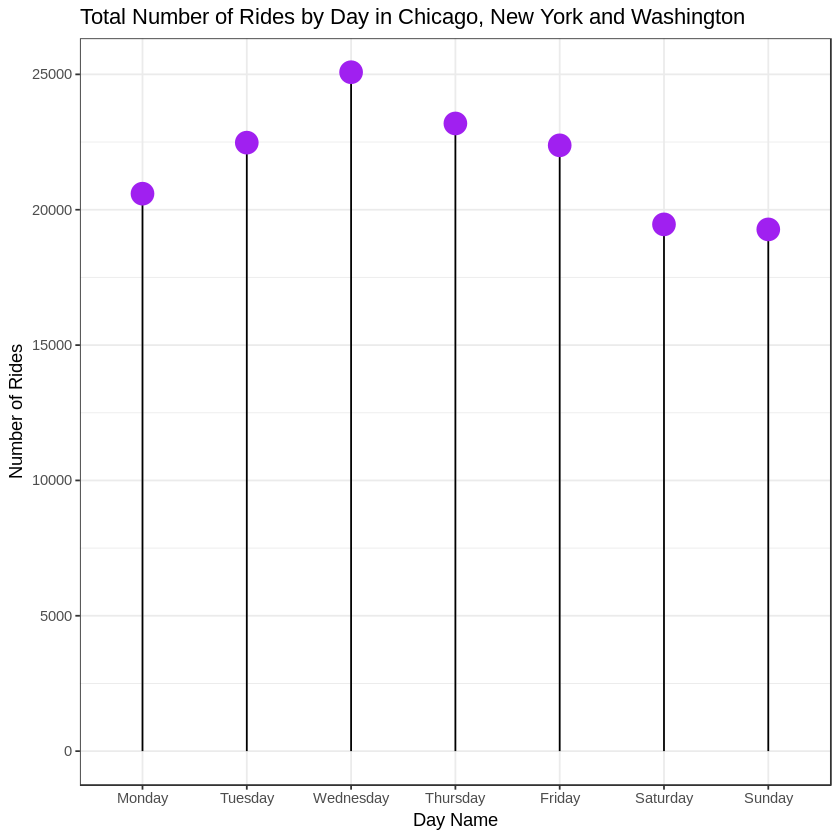

In [38]:
#lollipop chart to compare each day

day_count %>%
  arrange(Count) %>%

  #reorder Weekday names
  mutate(Day = factor(Day, levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 
                                      'Sunday'))) %>%
  
    ggplot( aes(x=Day, y=Count)) +
    geom_segment( aes(xend=Day, yend=0)) +
    geom_point( size=6, color="purple") +
    theme_bw() +
    labs(title = 'Total Number of Rides by Day in Chicago, New York and Washington', x = 'Day Name', 
         y = 'Number of Rides')


> **With 25080 total rides, Wednesday is the most popular day to use a bike share system.**

<hr style='border:2px solid black'>

<a id='2'></a>
### Question 2

**What are the top 20 most common trip from start to end in each city?**

> For this question, we will be plotting each city individually.  Below are the functions we will use for each to reduce the amount of code needed.

In [39]:
#Using nested function to create a data frame for the top 20 trips in a city
#val is the name of the city
#df is the name of our data frame

top_trip_function <- function(val, df) {
    hold <- bike_data %>% filter(Location == val)
    func_df <- data.frame(Ride.ID = hold$Ride.ID, Start.Station = hold$Start.Station, End.Station = hold$End.Station)

#nesting function
    top_twenty_function <- function(val_df) {
    val_df <- (val_df %>% count(Start.Station, End.Station, sort= TRUE))[1:20,]
    colnames(val_df)[colnames(val_df) == 'n'] ='Trip.Count'
    return(val_df)
}
    
    return(top_twenty_function(func_df))
    
}

In [40]:
#creates bubble plot 
# val is the name of data frame
# city is the name of the city to use in the title of the chart

bubble_plot_func <- function(val, city)
val %>%
  arrange(desc(Trip.Count)) %>%

ggplot(aes(x=End.Station, y=Start.Station, size = Trip.Count)) +
    geom_point(alpha=0.5, aes(colour = Trip.Count)) +
    scale_size(range = c(.1, 20)) +
    labs(x = "Ending Location", y = "Starting Location", size = "Number of Trips", title = paste('Top 20 Most Common Bike Share Trips in', rlang::as_name(city))) +
    theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
    scale_color_gradient()

<hr style='border:1px solid black'>

**Plotting for Chicago**

In [41]:
#Calling function that creates a new dataframe for the count of the top 20 trips taken in Chicago
chi_stations <- top_trip_function('Chicago', chi_stations)
head(chi_stations)


Start.Station,End.Station,Trip.Count
Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,32
Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,32
Streeter Dr & Grand Ave,Lake Shore Dr & North Blvd,23
Lake Shore Dr & North Blvd,Streeter Dr & Grand Ave,17
Streeter Dr & Grand Ave,Theater on the Lake,17
Streeter Dr & Grand Ave,Lake Shore Dr & Monroe St,15


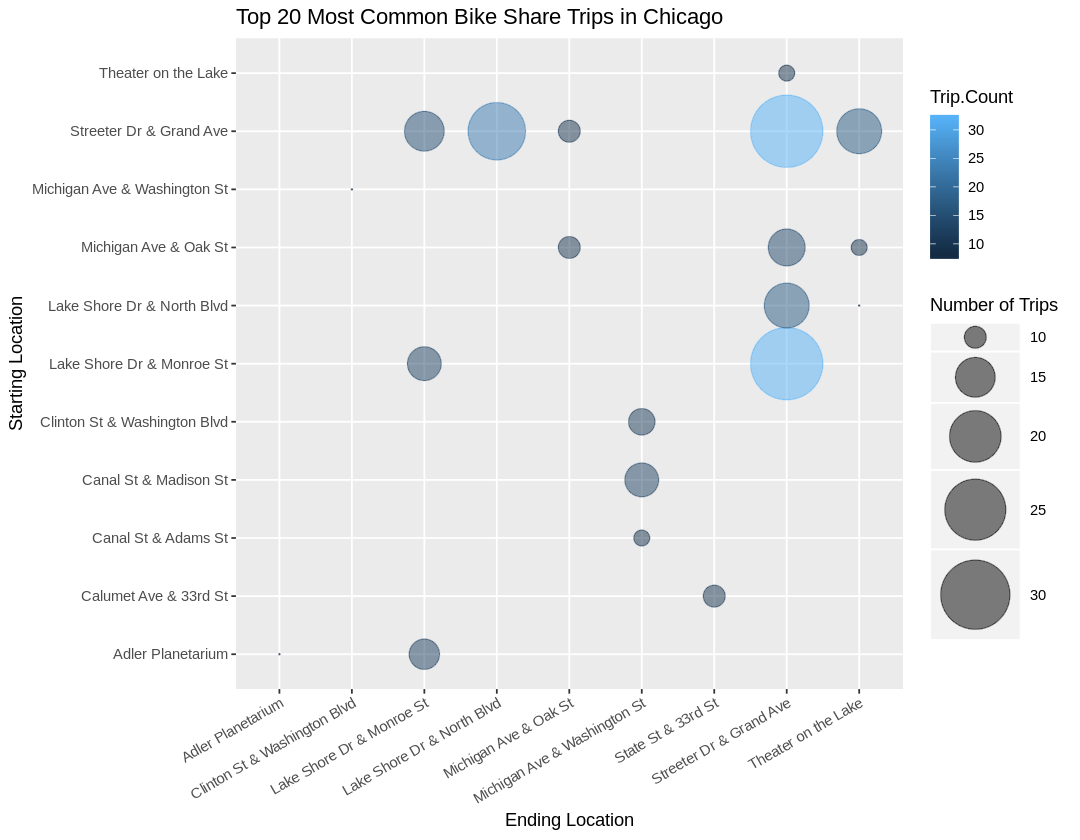

In [42]:
#Setting size of the chart
options(repr.plot.width = 9, repr.plot.height = 7)

#Calling Bubble Chart function for Chicago
bubble_plot_func(chi_stations, 'Chicago')

<hr style='border:1px solid black'>

**Plotting for New York**

In [43]:
#Calling function that creates a new dataframe for the count of the top 20 trips taken in New York
ny_stations <- top_trip_function('New York', ny_stations)
head(ny_stations)

Start.Station,End.Station,Trip.Count
E 7 St & Avenue A,Cooper Square & E 7 St,33
Central Park S & 6 Ave,Central Park S & 6 Ave,31
Centre St & Chambers St,Centre St & Chambers St,24
Pershing Square North,W 33 St & 7 Ave,24
Pershing Square North,Broadway & W 32 St,20
Central Park North & Adam Clayton Powell Blvd,Central Park North & Adam Clayton Powell Blvd,18


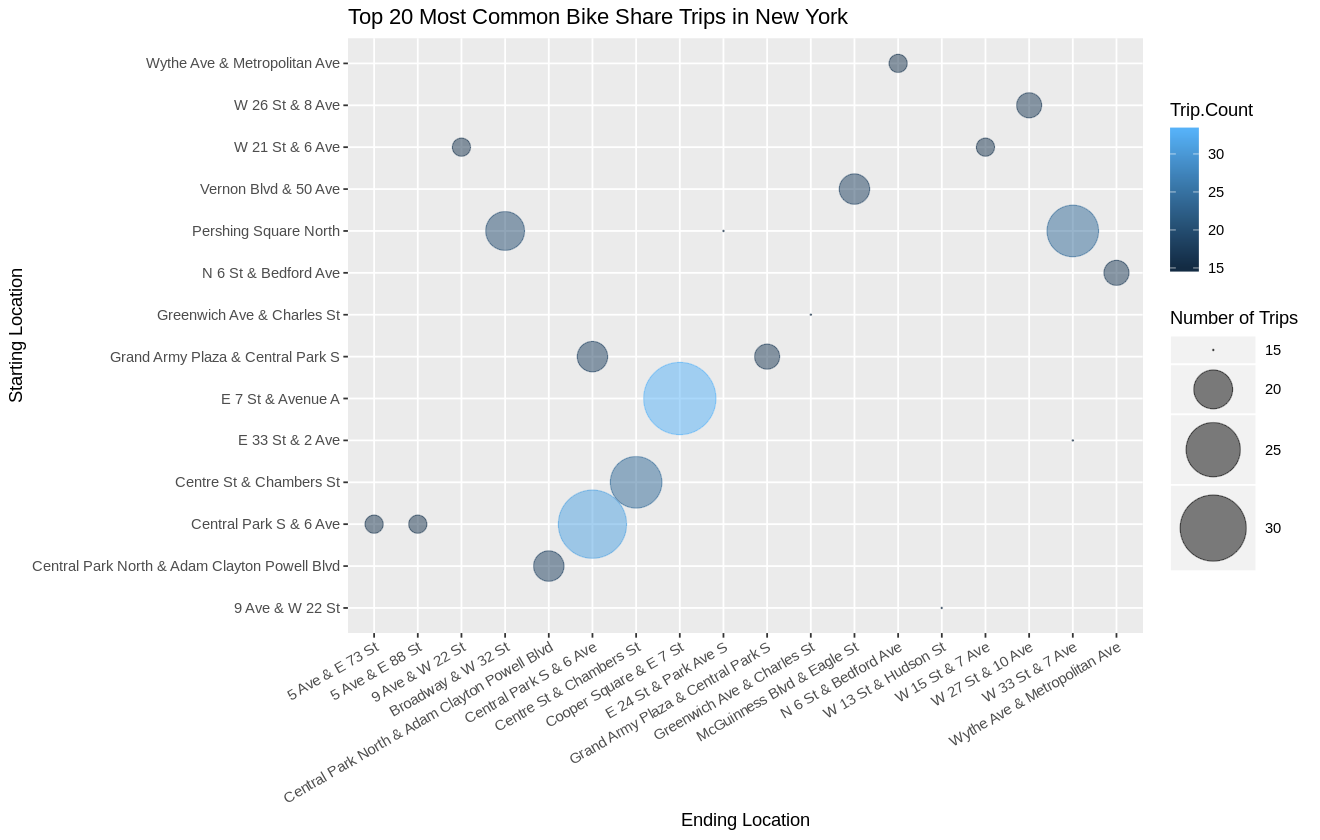

In [44]:
#Setting size for the chart
options(repr.plot.width = 11, repr.plot.height = 7)

#Calling Bubble Chart function for New York
bubble_plot_func(ny_stations, 'New York')

<hr style='border:1px solid black'>

**Plotting for Washington**

In [45]:
#Calling function that creates a new dataframe for the count of the top 20 trips taken in Washington
wash_stations <- top_trip_function('Washington', wash_stations)
head(wash_stations)

Start.Station,End.Station,Trip.Count
Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,198
Smithsonian-National Mall / Jefferson Dr & 12th St SW,Smithsonian-National Mall / Jefferson Dr & 12th St SW,192
Lincoln Memorial,Jefferson Dr & 14th St SW,143
Lincoln Memorial,Jefferson Memorial,143
Jefferson Dr & 14th St SW,Lincoln Memorial,138
Lincoln Memorial,Lincoln Memorial,120


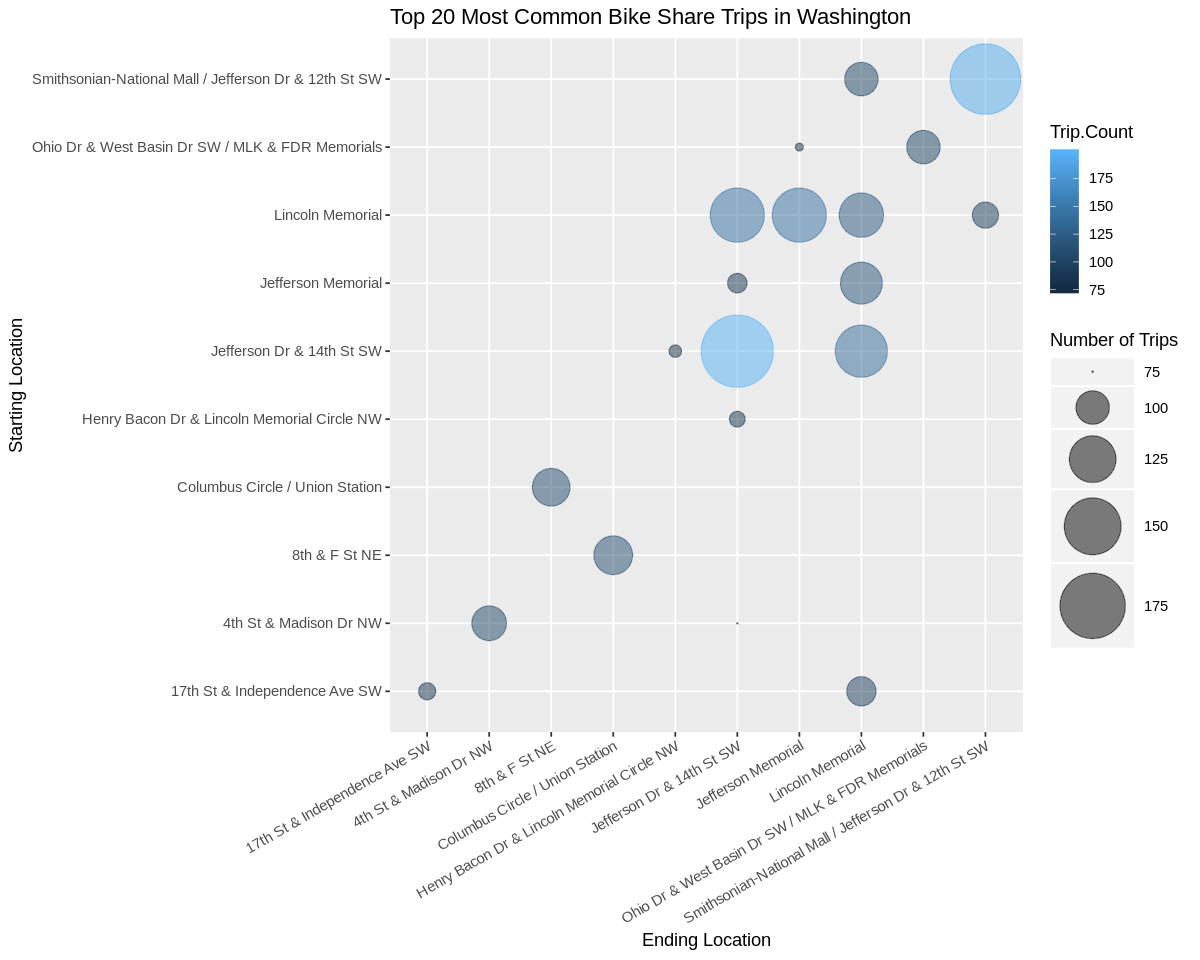

In [46]:
#setting size for the chart
options(repr.plot.width = 10, repr.plot.height = 8)

#Calling Bubble Chart function for Washington
bubble_plot_func(wash_stations, 'Washington')

**The top trip taken in each city are:** <br>
<br>
<em>Chicago</em> - 32 Trips Each<br>
<strong>Starting</strong>: Lake Shore Dr & Monroe St <strong>Ending</strong>: Streeter Dr & Grand Ave <br>
<strong>Starting / Ending </strong>: Streeter Dr & Grand Ave

<em>New York</em> - 33 Trips <br>
<strong>Starting</strong>: E 7 St & Avenue A <strong>Ending</strong>: Cooper Square & E 7 St<br>

<em>Washington</em> - 198 Trips <br>
<strong>Starting</strong>: Jefferson Dr & 14th St SW  <strong>Ending</strong>: Jefferson Dr & 14th St SW <br>

<hr style='border:2px solid black'>

<a id='3'></a>
### Question 3

**What is the average travel time for users in different cities?**

In [47]:
#Using the boxplot.stats()$out to identify the outliers in the Trip Duration Minute column

hold <- boxplot.stats(bike_data$Trip.Duration.Min)$out
outlier_all <- which(bike_data$Trip.Duration.Min %in% c(hold))
summary(outlier_all)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     32   67596   95964   91579  124076  152432 

In [48]:
#number of outliers identified
length(outlier_all)

[1] 9984

In [58]:
#percent of data set that is an outlier
round((length(outlier_all) / length(bike_data$Trip.Duration.Min)) * 100, digits = 2)

[1] 6.55

In [50]:
#infomation for the dataset with outliers
summary(bike_data$Trip.Duration.Min)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     6.53    11.12    18.30    19.30 18143.90 

In [51]:
#information for the dataset without outliers
hold <- bike_data %>% filter(Trip.Duration.Min < 32)
bike_no_out <- data.frame(Ride.ID = hold$Ride.ID, Location = hold$Location, Trip.Duration.Min = hold$Trip.Duration.Min) 
summary(bike_no_out$Trip.Duration.Min)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    6.20   10.15   11.94   16.43   31.98 

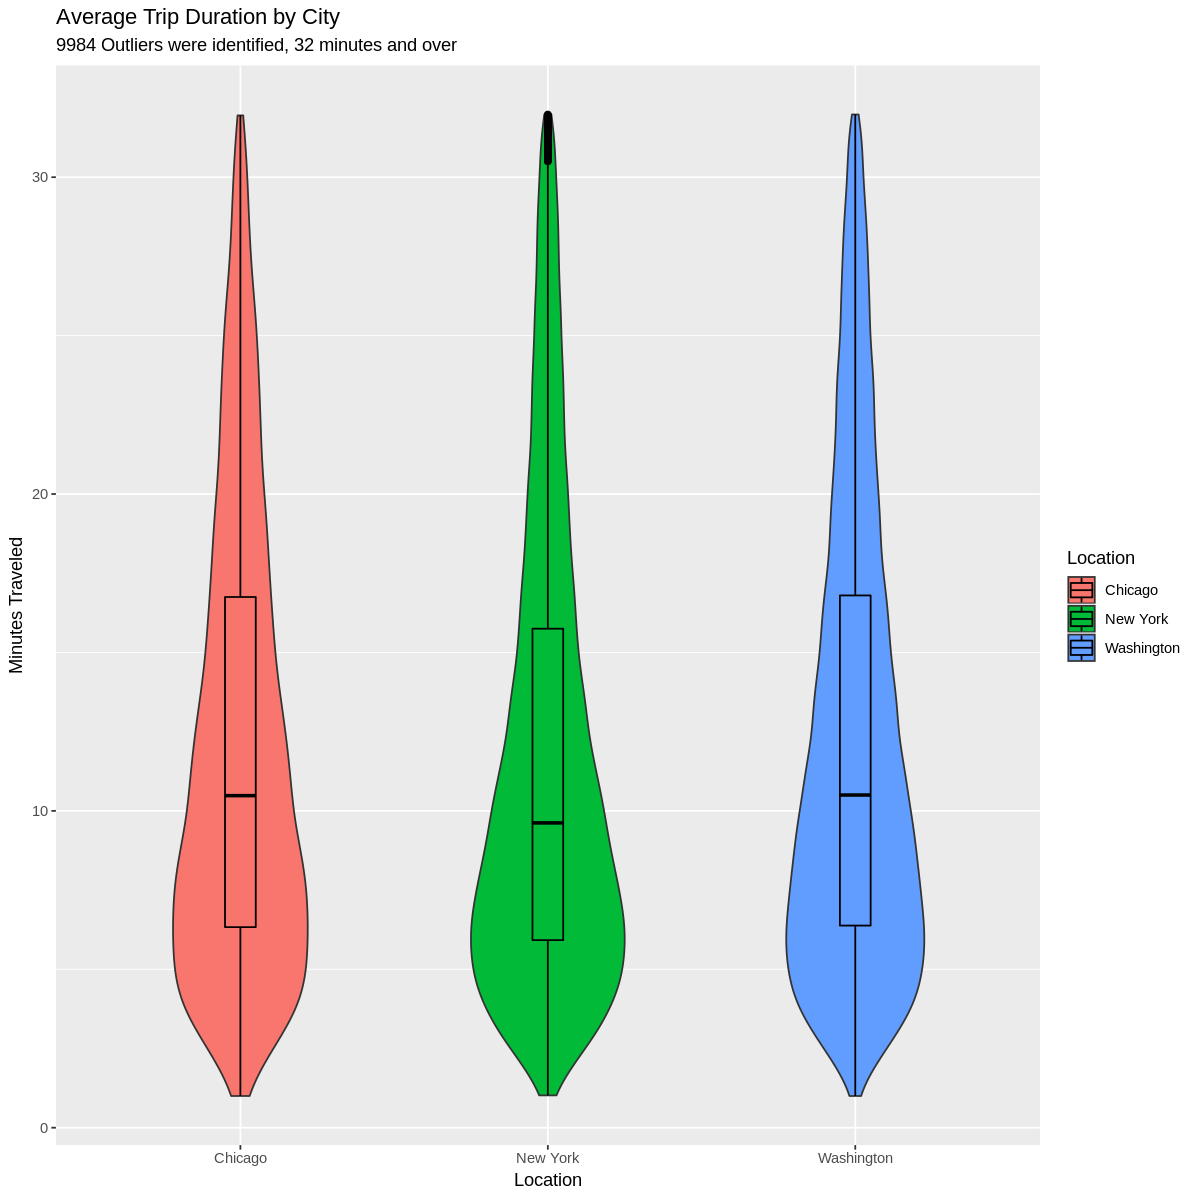

In [52]:
#Violin Chart


options(repr.plot.width = 10, repr.plot.height = 10)


ggplot(bike_no_out, aes(x=Location, y=Trip.Duration.Min, fill=Location)) + 
    labs(x = 'Location', y = 'Minutes Traveled', title = 'Average Trip Duration by City',subtitle ='9984 Outliers were identified, 32 minutes and over') +
    geom_violin(width= 0.5) +
    geom_boxplot(width=0.1, color='black', alpha=0.2)


In [53]:
#function that outputs the summary of Trip duration by City
trip_summary_function <- function(val) {
    hold <- bike_no_out %>% filter(Location == val )
    return(summary(hold$Trip.Duration.Min))
}

In [54]:
trip_summary_function('Chicago')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    6.33   10.48   12.06   16.75   31.95 

In [55]:
trip_summary_function('New York') 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.02    5.92    9.62   11.53   15.75   31.98 

In [56]:
trip_summary_function('Washington')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    6.38   10.50   12.20   16.80   31.98 

**In order of longest to shortest, the Average trip duration for each city is:** <br>
Washington - 12.20 minutes<br>
Chicago - 12.06 minutes<br>
New York - 11.56 minutes<br>

These numbers were calculated without the outlying data points. The outliers made up 6.55% of the original data set. 

In [57]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')